In [1]:
from glob import glob
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file_list = glob('/nvme1/fwi-forcings/ECMWF_FO_2019*.nc')

In [3]:
files = sorted(sorted(file_list), key=lambda x: int(x.split("2019")[1].split("_1200_hr_")[0][:2])*100 + int(x.split("2019")[1].split("_1200_hr_")[0][2:])); files

['/nvme1/fwi-forcings/ECMWF_FO_20190401_1200_hr_rh.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190401_1200_hr_t2.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190401_1200_hr_tp.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190401_1200_hr_wspeed.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190402_1200_hr_rh.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190402_1200_hr_t2.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190402_1200_hr_tp.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190402_1200_hr_wspeed.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190403_1200_hr_rh.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190403_1200_hr_t2.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190403_1200_hr_tp.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190403_1200_hr_wspeed.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190404_1200_hr_rh.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190404_1200_hr_t2.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190404_1200_hr_tp.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190404_1200_hr_wspeed.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_20190405_1200_hr_rh.nc',
 '/nvme1/fwi-forcings/ECMWF_FO_2

In [19]:
files = files[:736]

In [20]:
full = xr.open_mfdataset(files, engine='h5netcdf')

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and mergin

In [5]:
full

,Array,Chunk
Bytes,144.18 GB,524.29 MB
Shape,"(2750, 2560, 5120)","(10, 2560, 5120)"
Count,825 Tasks,275 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,144.18 GB,524.29 MB
Shape,"(2750, 2560, 5120)","(10, 2560, 5120)"
Count,825 Tasks,275 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [22]:
full.mean().rh.values

array(72.0719, dtype=float32)

In [23]:
full.var().rh.values

array(356.50388, dtype=float32)

In [24]:
mean = full.mean()

In [25]:
print(mean.t2.values, mean.tp.values, mean.wspeed.values)

281.2282 2.4886389 6.499784


In [26]:
var = full.var()

In [27]:
print(var.t2.values, var.tp.values, var.wspeed.values)

482.0745 37.633713 13.88191


In [9]:
def stats(x):
    tmp = x.mean()
    print('mean', tmp)
    print('mad', np.abs(x-tmp).mean())
    print('var', x.var())
    print('min', x.min())
    print('max', x.max())

In [ ]:
stats(full.rh.values)

In [ ]:
stats(full.t2.values)

In [ ]:
stats(full.tp.values)

In [ ]:
stats(full.wspeed.values)

In [32]:
tmp1 = xr.open_dataset('/nvme1/fwi-forcings/ECMWF_FO_20190401_1200_hr_rh.nc')

In [33]:
tmp2 = xr.open_dataset('/nvme1/fwi-forcings/ECMWF_FO_20190402_1200_hr_rh.nc')

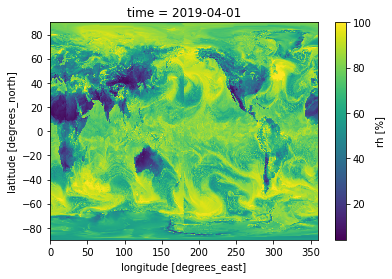

In [37]:
tmp1.rh[0].plot()

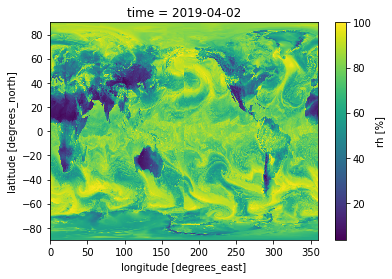

In [35]:
tmp1.rh[1].plot()

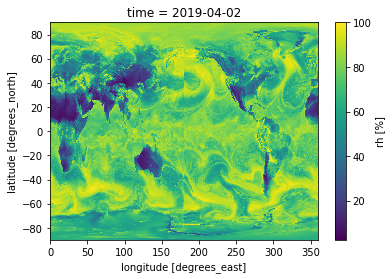

In [36]:
tmp2.rh[0].plot()

In [34]:
(tmp1.rh[1].values == tmp2.rh[0].values).sum()

16

# Preprocessing

In [38]:
lambda x: x.isel(time=slice(0,1))

In [39]:
proc = xr.open_mfdataset(files, preprocess=preprocess, engine='h5netcdf')

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and mergin

In [45]:
def stats(x):
    tmp = x.mean().values
    print('mean', tmp)
    print('mad', abs(x-tmp).mean().values)
    print('var', x.var().values)
    print('min', x.min().values)
    print('max', x.max().values)

In [46]:
stats(proc.rh)

mean 72.03445
mad 14.256372
var 354.31964
min 0.059931565
max 100.064285


In [47]:
stats(proc.t2)

mean 281.2624
mad 16.594109
var 480.72104
min 193.66562
max 324.16202


In [48]:
stats(proc.tp)

mean 2.4925985
mad 3.0615451
var 40.601112
min 0.0
max 1062.0919


In [49]:
stats(proc.wspeed)

mean 6.5504117
mad 2.9618351
var 13.947631
min 6.866455e-05
max 47.25583


In [50]:
t = proc.load()

In [51]:
t

<xarray.Dataset>
Dimensions:  (lat: 2560, lon: 5120, time: 184)
Coordinates:
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
  * time     (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-10-01
Data variables:
    rh       (time, lat, lon) float32 81.26943 81.26936 ... 63.66083 63.660107
    t2       (time, lat, lon) float32 253.29196 253.2922 ... 219.69902 219.6998
    tp       (time, lat, lon) float32 1.5182495 1.5183092 ... 0.007659243
    wspeed   (time, lat, lon) float32 10.493841 10.493819 ... 5.777047 5.7775283
Attributes:
    CDI:               Climate Data Interface version 1.9.8 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Wed Jun 03 14:41:12 2020: cdo --silent -select,name=rh...
    Reference date:    20190401
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.9.8 (https://mpimet.m...